## <p style="text-align: center;">Slutuppgift statistiska metoder</p>

- Sara Gunnars
- AI22
- 2023-08-31

I denna rapport så kommer jag att analysera samt dra slutsatser kring datasetet Wines. Jag kommer utgår ifrån ett antal frågeställningar och besvara dessamed hjälp av statistiska metoder. I den inledande delen av rapporten bekräknas deskriptiv statistik som syftar till att ge en överblick över datan jag arbetar med. Därefter kommer även utförs hypotest, beräkning av konfidensintervall, korrelation och enkel linjär regression.  

Datasetet som används i uppgifter bygger på kemiska analyser av tre olika sorters druvor från samma region i Italien.

Innan jag börjar med uppgifterna kommer jag att importera passande python paket, läsa in datasetet samt namnge varje column.

In [111]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [112]:
#Lista med kolumn namn
colnames = ['WineId', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']

#läser in dataset
df = pd.read_csv('Data/wine/wine.csv', names= colnames, header= None)

#random seed
random_seed = np.random.seed(2023)

#en överblick över datasetet
df.head()

,WineId,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [113]:
#No missing values
df.isna().value_counts()

WineId  Alcohol  Malic_acid  Ash    Alcalinity_of_ash  Magnesium  Total_phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  Hue    OD280/OD315_of_diluted_wines  Proline
False   False    False       False  False              False      False          False       False                 False            False            False  False                         False      178
Name: count, dtype: int64

### <p style="text-align: center;">Deskriptiv statistik </p>

#### 1. Alkoholhaltens medelvärde och standardavvikelse

Formel för medlevärde : $\frac{\sum_{X}^{}}{n}$ samt formeln för standardavvikelsen :$\sqrt{\frac{\sum_{x-\hat{x}^{2}}^{}}{n-1}}$

In [126]:
#Grupperar datan efter vin ID samt beräknar medelvärde och standardavvikelse för varje grupp
alcohol_mean_std = df.groupby(['WineId'], as_index= False).agg({'Alcohol': ['mean', 'std']})
alcohol_mean_std

WineId    Alcohol          
               mean       std
0      1  13.744746  0.462125
1      2  12.278732  0.537964
2      3  13.153750  0.530241

In [122]:
#delar upp dataframe i medelvärde och standardavvikelse då jag kommer använda detta i en plott nedan
alcohol_mean = alcohol_mean_std['Alcohol']['mean']
alcohol_std = alcohol_mean_std['Alcohol']['std']

Plotta alkoholhalten som ett histogram för varje druva, med medelvärdet som en vertikal linje i histogrammet, samt medelvärdet och standardavvikelsen i en textruta. Verkar det som om dataseten följer någon underliggande fördelning?

In [115]:
# Dataframes för varje druva
wine_1 = df.loc[df['WineId'] == 1]
wine_2 = df.loc[df['WineId'] == 2]
wine_3 = df.loc[df['WineId'] == 3]

#dict med de tre olika druv df
wine_dict = {'Druva 1': wine_1, 'Druva 2': wine_2, 'Druva 3': wine_3}

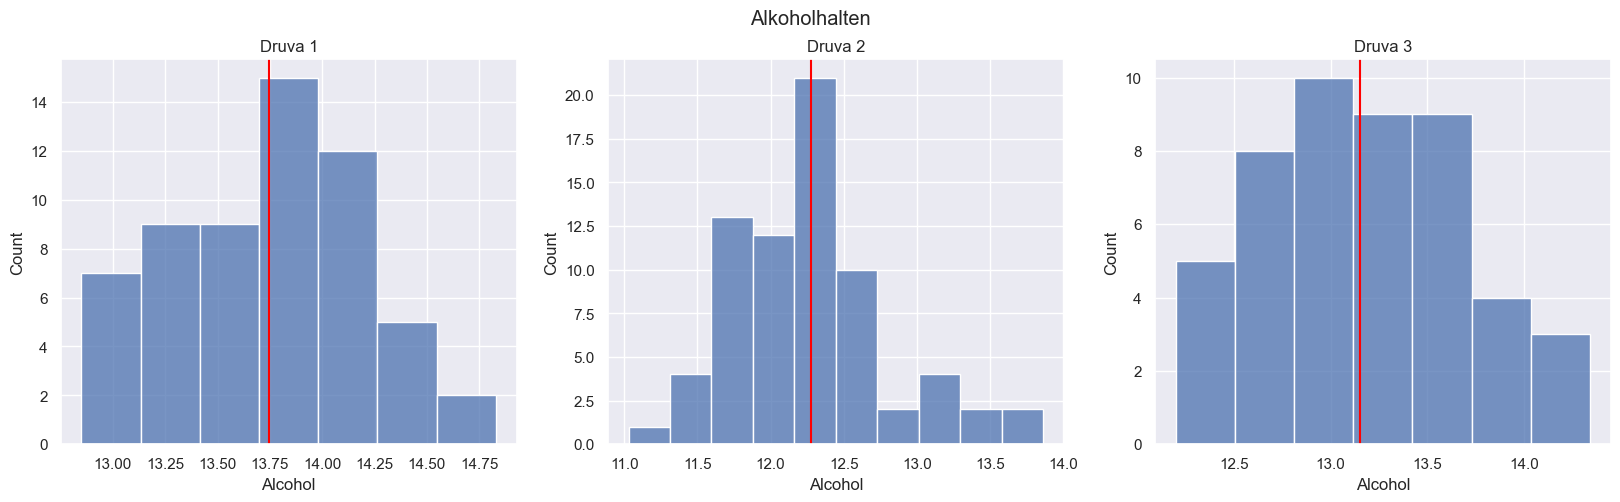

In [124]:
#skapar figur, sätter upp tre subplots samt titel
fig, ax = plt.subplots(1,3, figsize = (20,5))
fig.suptitle('Alkoholhalten')


for i, grape in enumerate(wine_dict): 
    
    ax[i].set_title(f'{grape}')
    sns.histplot(ax = ax[i], data= wine_dict[grape], x= 'Alcohol') 
    ax[i].axvline(x = alcohol_mean[i], ymin = 0, ymax = 1, color = 'red')
   
       